In [ ]:
import numpy as np
import pandas as pd
import requests

rng = np.random.default_rng()
matieres = ['maths', 'anglais', 'philo', 'python', 'histoire', 'sciences']
for annee in range(2019, 2024):
    N = rng.integers(35,50)
    dico = {}
    for m in matieres:
        notes = np.clip(np.round(rng.standard_normal(N)*4 + 11), 0, 20)
        dico[m] = notes

    resp = requests.get(f'https://randomuser.me/api/?results={N}&nat=fr')
    users = resp.json()["results"]
    noms =[]
    for user in users:
        noms.append(user['name']["first"])

    df = pd.DataFrame(dico, index=noms)
    df.to_excel(f"notes_{annee}.xlsx")

# Miniprojet Excel

L'objectif de ce miniprojet est d'automatiser un traitement de données sur des fichiers excel.

### Question 1 
Ecrivez une fonction qui lecture(nom_fichier) qui lit un ficher excel en utilisant la librairie pandas et retourne un objet DataFrame.
Le paramètre nom_fichier correspond au nom du fichier.
Vous utiliserez la première colonne du fichier excel (= le nom de l'étudiant.e) comme nom des lignes (l'index du DataFrame)

Testez votre fonction et vérifiez qu'elle fonctionne correctement avec un argument de type 'str' ou de type 'pathlib.Path'

In [3]:
import pathlib
import pandas as pd

def lecture(nom_fichier):
    """Lit un fichier excel dont le nom est passé en paramètre et retourne un objet DataFrame"""
    df = pd.read_excel(nom_fichier, index_col=0)
    return df

# test avec str
d = lecture("notes_2019.xlsx")
print(d.head())

# test avec pathlib
path = pathlib.Path.cwd() / "notes_2019.xlsx"
d = lecture(path)
print(d.head())

          maths  anglais  philo  python  histoire  sciences
Louna        13       19     19      13        14        14
Emile        16        8     14      18        12        16
Célian       12       10     18      13        11        13
Diego         6       10     13       6        12        10
Aurélien     12       16     13      12        12         8
          maths  anglais  philo  python  histoire  sciences
Louna        13       19     19      13        14        14
Emile        16        8     14      18        12        16
Célian       12       10     18      13        11        13
Diego         6       10     13       6        12        10
Aurélien     12       16     13      12        12         8


### Question 2 : 
En utilisant la DataFrame retrournée par votre fonction lecture, répondez aux questions suivantes :
- Combien Olivia a-t-elle eu en maths ? 
- Combien y a t-il d'élèves dans la classe ?

Pour vous aider, vous pouvez consulter l'aide des méthodes de l'objet DataFrame suivantes : loc et shape 

In [ ]:
import numpy as np
import pandas as pd

d = lecture("notes_2019.xlsx")
print("La note de Olivia en Maths :", d.loc['Olivia', 'maths'])
print(f'il y a {d.shape[0]} élèves dans la classe')



La note de Olivia en Maths : 9
il y a 36 élèves dans la classe


### Question 3

Calculer la moyenne et l'écart type de la classe dans chaque matière. Pour cela, on vous propose deux méthodes :

1) faites une boucle sur les différentes colonnes de la DataFrame (voir la méthode 'columns'), puis calculez la moyenne et l'écart type avec les fonction numpy np.average et np.std
2) utilisez les méthodes 'mean' et 'std' de l'objet DataFrame

In [8]:
import numpy as np
d = lecture("notes_2019.xlsx")

# méthode 1
for matiere in d.columns:
    moyenne = np.average(d[matiere])
    ecart = np.std(d[matiere])
    print(f"en {matiere}, la moyenne de la classe est de {moyenne:.3f}, avec un acart type de de {ecart:.3f}")

# méthode 2
print(d.mean())
print(d.std())

en maths, la moyenne de la classe est de 11.472, avec un acart type de de 4.239
en anglais, la moyenne de la classe est de 10.722, avec un acart type de de 4.700
en philo, la moyenne de la classe est de 11.806, avec un acart type de de 3.843
en python, la moyenne de la classe est de 10.667, avec un acart type de de 3.902
en histoire, la moyenne de la classe est de 11.222, avec un acart type de de 3.351
en sciences, la moyenne de la classe est de 11.222, avec un acart type de de 4.353
maths       11.472222
anglais     10.722222
philo       11.805556
python      10.666667
histoire    11.222222
sciences    11.222222
dtype: float64
maths       4.299409
anglais     4.766617
philo       3.897394
python      3.956911
histoire    3.398412
sciences    4.414982
dtype: float64


### Question 4 : 
On souhaite à présent récupérer et regrouper les informations présentes sur plusieurs fichiers excel. Ces derniers représentent les notes obtenues au cours de différentes années, par différentes classes d'étudiants, mais toujours sur les mêmes matières.

Créez une fonction lecture_multi(liste_fichiers) qui renvoie une liste de DataFrame correspondant aux données présentes dans les différents fichiers excel, dont les noms sont passés en paramètres.

Testez votre fonction.

In [11]:
def lecture_multi(liste_fichiers):
    dfs = []
    for nom_fichier in liste_fichiers:
        dfs.append(pd.read_excel(nom_fichier, index_col=0))
    return dfs

# test
fichiers = ["notes_2019.xlsx", "notes_2020.xlsx"]
dfs = lecture_multi(fichiers)
print(dfs[0].head())
print(dfs[1].head())

          maths  anglais  philo  python  histoire  sciences
Louna        13       19     19      13        14        14
Emile        16        8     14      18        12        16
Célian       12       10     18      13        11        13
Diego         6       10     13       6        12        10
Aurélien     12       16     13      12        12         8
         maths  anglais  philo  python  histoire  sciences
Anatole     17        5      8      18         6        11
Ambre       11       11      5      20         7        13
Elliot      16       14     10      15        15         8
Florent      2       15      7       9        20        13
Emeline     10       11     18       5         4        13


### Question 5

Créez une fonction fichiers_notes(debut, fin) qui renvoie une liste de chaines de caractère du type 'notes_XXXX.xlsx', où XXXX correspond à une année. Les différentes valeurs de l'année seront comprises entre 'debut' et 'fin', les deux paramètres de la fonction.

In [14]:
def fichiers_notes(debut, fin):
    return [f"notes_{a}.xlsx" for a in range(debut, fin+1)]

### Question 6

Affichez sur un graphique l'évolution du nombre d'étudiant.e.s par classe en fonction des années

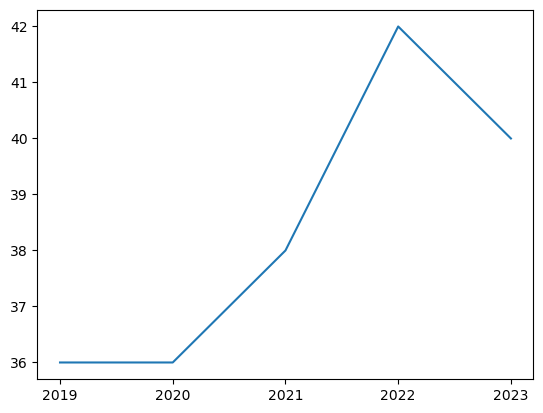

In [16]:
from matplotlib import pyplot as plt

dfs = lecture_multi(fichiers_notes(2019, 2023))

nombre = []
for df in dfs:
    nombre.append(df.shape[0])

plt.plot(range(2019, 2024), nombre)
plt.xticks(range(2019, 2024))
plt.show()

### Question 7

Affichez sur un graphique l'évolution de la moyenne dans chaque matère en fonction des années. 

Pour rassembler les moyennes par matières à partir des différentes DataFrames, il y a plusieurs possibilités. On vous propose ci-dessous une façon de faire, mais n'hésitez pas à faire autrement !

1) Créer une Dataframe "matieres" qui contient uniquement les noms de colonne correspondant aux différentes matières, sans aucune valeurs
2) Grâce à une boucle, insérer au fur et à mesure de nouvelles lignes à la DataFrame "matières". Chaque ligne a pour index l'année et pour valeurs la moyenne dans chaque matière de cette année là.
3) On peut alors tracer directement toutes ces données à l'aide de la méthode DataFrame.plot()

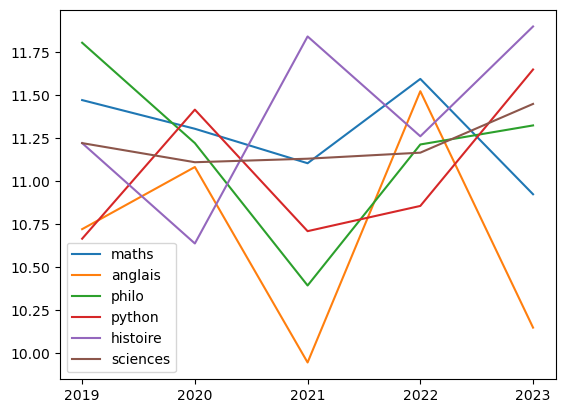

In [20]:
dfs = lecture_multi(fichiers_notes(2019, 2023))

matieres = dfs[0].columns
moyennes = pd.DataFrame(columns=matieres)

for df, annee in zip(dfs, range(2019, 2024)):
    moyennes.loc[annee,:] = df.mean()

moyennes.plot()
plt.xticks(range(2019, 2024))
plt.show()

### Bonus

Créez, avec l'explorateur Windows ou équivalent, sur votre disque dur plusieurs sous-répertoires nommés 2019, 2020, ... et placez-y le fichier de note correspondant.

Ecrivez une nouvelle version de la fonction fichiers_notes(debut, fin), qui renvoie cette fois-ci une liste d'objet pathlib.Path

Testez votre fonction dans la question 7

In [23]:
def fichiers_notes(debut, fin):
    return [pathlib.Path.cwd() / str(a) / f"notes_{a}.xlsx" for a in range(debut, fin+1)]

u = fichiers_notes(2019, 2024)
print(u)

[WindowsPath('e:/s_drive/enseignement/cours/cours python/IMT/miniprojets/excel/2019/notes_2019.xlsx'), WindowsPath('e:/s_drive/enseignement/cours/cours python/IMT/miniprojets/excel/2020/notes_2020.xlsx'), WindowsPath('e:/s_drive/enseignement/cours/cours python/IMT/miniprojets/excel/2021/notes_2021.xlsx'), WindowsPath('e:/s_drive/enseignement/cours/cours python/IMT/miniprojets/excel/2022/notes_2022.xlsx'), WindowsPath('e:/s_drive/enseignement/cours/cours python/IMT/miniprojets/excel/2023/notes_2023.xlsx'), WindowsPath('e:/s_drive/enseignement/cours/cours python/IMT/miniprojets/excel/2024/notes_2024.xlsx')]
